##Random forest en el dataset del titanic:

Integrantes de los larvalácticos: Nicolás Espinoza,
             Luis González, 
             Carlos Méndez

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [6]:
import io
from google.colab import files 
  
uploaded = files.upload()

Saving Titanic.csv to Titanic (1).csv


In [8]:
labels = ('PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked')
df = pd.read_csv(io.BytesIO(uploaded['Titanic.csv']), header = 0, names = labels,sep = ',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Cambiamos la variable categórica Sex por la variable numérica Sex_male (Donde male = 1, fremale = 0)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
#Caracteristicas que se usaran en el modelo
data = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0


In [20]:
from sklearn.model_selection import train_test_split
#variable independiente
X = data.drop(["Survived"],axis = 1)

#variable dependiente
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [25]:
#se crea el modelo de random forest y se configura el número de estimadores (árboles de decisión)
modelo = RandomForestClassifier(n_estimators = 19, random_state = 2016, min_samples_leaf = 8,)

In [22]:
modelo.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=2016)

In [23]:
#accuracy promedio
modelo.score(X_test, y_test)

0.7897196261682243

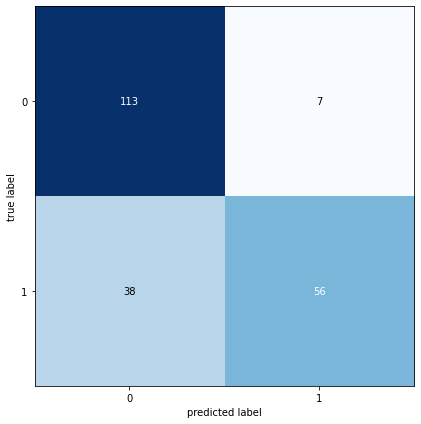

In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#predicción del modelo usando los datos de prueba
y_pred = modelo.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()